# CNN image 숫자 인식 모델

**tensorflow**, mnist


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

모델 구조 이미지가 'cnn_model.png'로 저장되었습니다.

🚀 모델 훈련 시작 (에포크: 5)...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.7410 - loss: 0.7998 - val_accuracy: 0.9794 - val_loss: 0.0721
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9623 - loss: 0.1337 - val_accuracy: 0.9845 - val_loss: 0.0482
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9758 - loss: 0.0847 - val_accuracy: 0.9897 - val_loss: 0.0310
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9814 - loss: 0.0645 - val_accuracy: 0.9896 - val_loss: 0.0341
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.9852 - loss: 0.0536 - val_accuracy: 0.9901 - val_loss: 0.0304


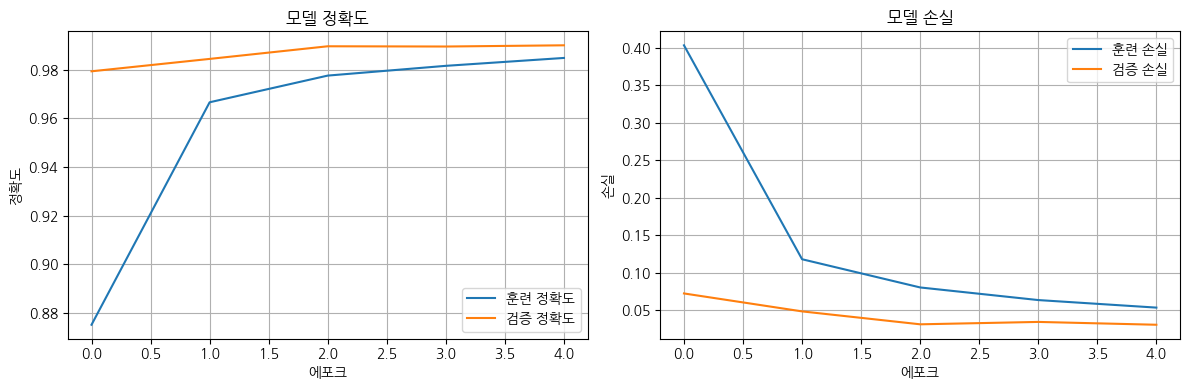


 모델 평가 중...
테스트 정확도: 0.9901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


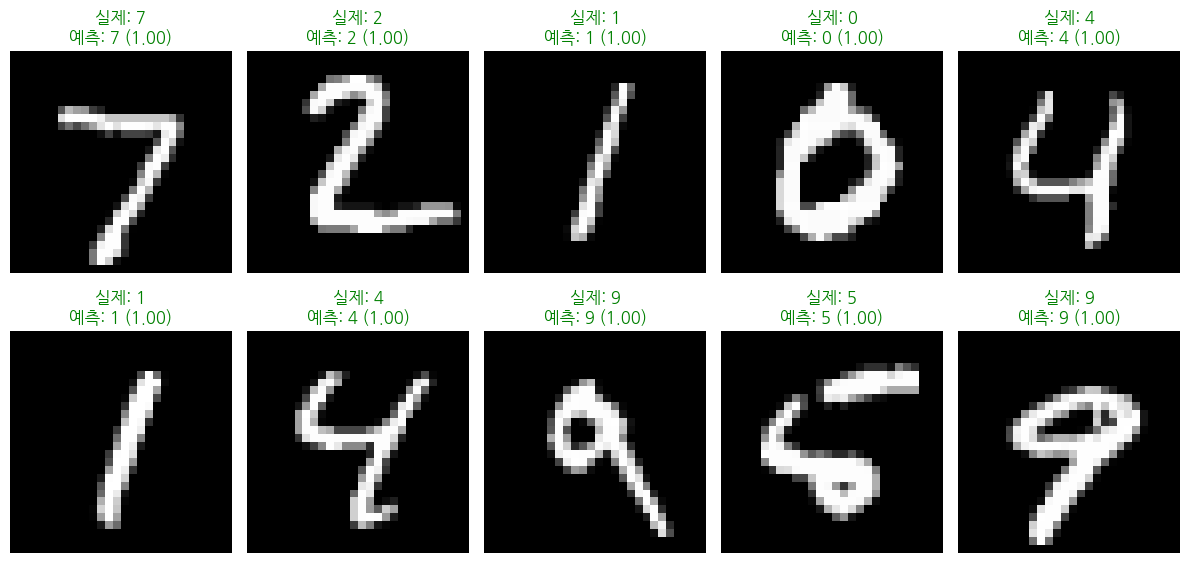


✅ 예제 1 완료!


In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# ============================================================================
# 예제 1: 기본 CNN을 이용한 MNIST 손글씨 숫자 분류
# ============================================================================

def load_and_preprocess_data():
    """MNIST 데이터를 로드하고 전처리합니다."""
    print("📁 MNIST 데이터 로딩 중...")

    # MNIST 데이터셋 로드
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # 데이터 형태 확인
    print(f"훈련 데이터 형태: {x_train.shape}")
    print(f"테스트 데이터 형태: {x_test.shape}")

    # 정규화 (0-255 -> 0-1)
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # CNN을 위해 채널 차원 추가 (28, 28) -> (28, 28, 1)
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # 원-핫 인코딩
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

def create_basic_cnn():
    """기본적인 CNN 모델을 생성합니다."""
    print("🏗️ CNN 모델 구성 중...")

    model = models.Sequential([
        # 첫 번째 Convolution Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # 두 번째 Convolution Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # 세 번째 Convolution Block
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Flatten과 Dense Layer
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),  # 과적합 방지
        layers.Dense(10, activation='softmax')  # 10개 클래스 분류
    ])

    return model

def visualize_model_architecture(model):
    """모델 구조를 시각화합니다."""
    print("\n📊 모델 구조:")
    model.summary()

    # 모델 구조를 그래프로 저장 (선택사항)
    try:
        tf.keras.utils.plot_model(model, to_file='cnn_model.png',
                                show_shapes=True, show_layer_names=True)
        print("모델 구조 이미지가 'cnn_model.png'로 저장되었습니다.")
    except:
        print("모델 구조 이미지 저장을 건너뜁니다.")

def train_model(model, train_data, validation_data, epochs=5):
    """모델을 훈련합니다."""
    print(f"\n🚀 모델 훈련 시작 (에포크: {epochs})...")

    # 모델 컴파일
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 모델 훈련
    history = model.fit(
        train_data[0], train_data[1],
        epochs=epochs,
        batch_size=128,
        validation_data=validation_data,
        verbose=1
    )

    return history

def visualize_training_history(history):
    """훈련 과정을 시각화합니다."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 정확도 그래프
    ax1.plot(history.history['accuracy'], label='훈련 정확도')
    ax1.plot(history.history['val_accuracy'], label='검증 정확도')
    ax1.set_title('모델 정확도')
    ax1.set_xlabel('에포크')
    ax1.set_ylabel('정확도')
    ax1.legend()
    ax1.grid(True)

    # 손실 그래프
    ax2.plot(history.history['loss'], label='훈련 손실')
    ax2.plot(history.history['val_loss'], label='검증 손실')
    ax2.set_title('모델 손실')
    ax2.set_xlabel('에포크')
    ax2.set_ylabel('손실')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

def evaluate_and_predict(model, test_data):
    """모델을 평가하고 예측을 수행합니다."""
    print("\n 모델 평가 중...")

    # 테스트 데이터로 평가
    test_loss, test_accuracy = model.evaluate(test_data[0], test_data[1], verbose=0)
    print(f"테스트 정확도: {test_accuracy:.4f}")

    # 몇 개 샘플에 대한 예측
    predictions = model.predict(test_data[0][:10])

    # 결과 시각화
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(10):
        ax = axes[i//5, i%5]
        ax.imshow(test_data[0][i].reshape(28, 28), cmap='gray')

        # 실제 레이블과 예측 레이블
        true_label = np.argmax(test_data[1][i])
        pred_label = np.argmax(predictions[i])
        confidence = np.max(predictions[i])

        color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f'실제: {true_label}\n예측: {pred_label} ({confidence:.2f})',
                    color=color)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# ============================================================================
# 메인 실행 함수
# ============================================================================

def main():
    """CNN 예제의 메인 실행 함수입니다."""
    print(" CNN 예제 1: MNIST 손글씨 숫자 분류")
    print("=" * 50)

    # 1. 데이터 로드 및 전처리
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

    # 2. 모델 생성
    model = create_basic_cnn()

    # 3. 모델 구조 확인
    visualize_model_architecture(model)

    # 4. 모델 훈련
    history = train_model(model, (x_train, y_train), (x_test, y_test), epochs=5)

    # 5. 훈련 과정 시각화
    visualize_training_history(history)

    # 6. 모델 평가 및 예측
    evaluate_and_predict(model, (x_test, y_test))

    print("\n✅ 예제 1 완료!")
    return model

# 실행
if __name__ == "__main__":
    trained_model = main()